# Desafío Spike - Oscar Mauriaca

Aqui una pequeña explicación del problema.

Bases de datos:

Costos marginales reales USD/MWh a nivel de barra y hora (cada fila es una barra y día-hora). costo_marginal_real.csv


Costos marginales programados USD/MWh (por el SIC) a nivel de barra y hora (cada fila es una barra y día-hora). costo_marginal_programado.csv


Base para entrenar modelos. base_para_predicción.csv


Nivel de observación: día-hora y subestación (cada fila es una subestación y día-hora).

nemotecnico_se: código subestación eléctrica

fecha, hora: año, mes, día y hora.

gen_eolica_total_mwh: generación eólica total por subestación en MWh

gen_geotermica_total_mwh: generación geotérmica total por subestación en MWh

gen_hidraulica_total_mwh: generación hidráulica total por subestación en MWh

gen_solar_total_mwh: generación solar total por subestación en MWh

gen_termica_total_mwh: generación térmica total por subestación en MWh

cmg_real: costo marginal real [USD/MWh] promedio por subestación

cmg_prog: costo marginal programado [USD/MWh] promedio por subestación

cmg_desv: desviación absoluta promedio entre costo marginal programado y costo marginal real

cmg_desv_pct: desviación porcentual promedio del costo marginal real con respecto al costo marginal programado

n_barras: número de barras conectadas aguas abajo de una subestación

demanda_mwh: retiros de energía [MWh] efectuados por compañías coordinadas bajo el sistema eléctrico

cap_inst_mw: capacidad de generación máxima instalada por subestación [MW]


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
#import requests

In [58]:
url_costomg_real = 'https://storage.googleapis.com/sistema_electrico_chile/costo_marginal_real.csv'
url_costomg_prog = 'https://storage.googleapis.com/sistema_electrico_chile/costo_marginal_programado.csv'
url_base_pred = 'https://storage.googleapis.com/sistema_electrico_chile/base_para_prediccion.csv'

In [3]:
df_real = pd.read_csv(url_costomg_real)
df_prog = pd.read_csv(url_costomg_prog)

In [4]:
df_real.tail()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
4309946,BA04G065SE002G065,BA02T002SE032T002,2019-01-23,24,76.38,51.35944,BA S/E LA LAJA ENERGIA COYANCO BARRA 110KV
4309947,BA03R003SE023R003,BA02T002SE032T002,2019-01-23,24,87.71,58.97796,BA S/E SAN SEBASTIAN BARRA 66KV N° 1
4309948,BA01T005SE050T005,BA02T002SE032T002,2019-01-23,24,89.58,60.23538,BA S/E LICANTEN 66KV
4309949,BA01G111SE001G111,BA02T002SE032T002,2019-01-23,24,76.30,51.30565,BA S/E CENTRAL SANTA MARTA 220KV
4309950,BA12T025SE075T025,BA02T002SE032T002,2019-01-23,24,63.54,42.72557,BA S/E ESMERALDA 110KV


In [5]:
df_prog.tail()

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
1192119,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,20,49.387641
1192120,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,21,50.186228
1192121,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,22,50.237093
1192122,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,23,49.969904
1192123,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,24,48.452660


Ejemplo: Duplicados

In [6]:
df_prog[(df_prog['mnemotecnico_barra']=='BA83L131SE134L131') & (df_prog['fecha']=='2019-06-06')]

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
1192076,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,1,48.930459
1192077,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,2,47.723161
1192078,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,3,47.608940
1192079,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,4,46.289543
1192080,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,5,46.103264
1192081,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,6,47.664590
1192082,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,7,49.105734
1192083,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,8,48.973171
1192084,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,9,44.916320
1192085,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,10,42.096565


In [7]:
duplicate_rows_prog = df_prog[df_prog.duplicated(
    ['mnemotecnico_barra', 'nombre_barra', 'fecha', 'hora'])]

In [8]:
duplicate_rows_prog['mnemotecnico_barra'].unique()

array(['-', 'BA01T002SE036T002', 'BA02T003SE004T003', 'BA83L131SE134L131'],
      dtype=object)

In [9]:
df_prog.shape, duplicate_rows_prog.shape

((1192124, 5), (188229, 5))

In [10]:
df_prog.shape[0] - duplicate_rows_prog.shape[0]

1003895

In [11]:
df_prog.drop_duplicates(
    subset=['mnemotecnico_barra', 'nombre_barra', 'fecha', 'hora'], inplace=True)

In [12]:
df_prog.rename(columns = {'mnemotecnico_barra': 'barra_mnemotecnico'}, inplace = True)

In [13]:
costo_marginal = pd.merge(df_real, df_prog, on=[
                          'barra_mnemotecnico', 'fecha', 'hora'], how='inner')
costo_marginal

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo
0,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,54.292145
1,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,BA S/E NUEVA PICHIRROPULLI 220KV B1,BA S/E NUEVA PICHIRROPULLI 220KV B1,60.620648
2,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,59.177969
3,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,BA S/E CENTRAL PEHUENCHE 220KV B1,BA S/E CENTRAL PEHUENCHE 220KV B1,54.566605
4,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,BA S/E SAN CRISTOBAL 110KV B1,BA S/E SAN CRISTOBAL 110KV B1,56.086260
...,...,...,...,...,...,...,...,...,...
900924,BA05T005SE288T005,BA02T002SE032T002,2019-01-23,24,63.65,42.79953,BA S/E SUR 110KV,BA S/E SUR 110KV,132.934674
900925,BA01L081SE066L081,BA02T002SE032T002,2019-01-23,24,73.18,49.20770,BA S/E FPC 154KV BP1,BA S/E FPC 154KV BP1,53.174872
900926,BA04T005SE071T005,BA02T002SE032T002,2019-01-23,24,67.20,45.18662,BA S/E OVALLE 66KV,BA S/E OVALLE 66KV,144.613620
900927,BA01L079SE004L079,BA02T002SE032T002,2019-01-23,24,77.61,52.18652,BA S/E PUENTE ALTO (CMPC) 110KV,BA S/E PUENTE ALTO (CMPC) 110KV,55.571525


# HACER EL ANALISIS EXPLORATORIO!!

# 2. Construcción de variables

In [14]:
# poner el tilde en desviacion
costo_marginal['desviacion'] = costo_marginal['costo_en_dolares'] - costo_marginal['costo']

In [18]:
costo_marginal['desviación_pct'] = 100 * \
    costo_marginal['desviacion']/costo_marginal['costo_en_dolares']

In [21]:
costo_marginal['desviacion_cat'] = costo_marginal['desviación_pct'].apply(lambda x: 1 if x >15 or x<-15 else 0)

In [26]:
# Hay costos reales = 0, ojo con eso!
costo_marginal.head(10)

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo,desviacion,desviación_pct,desviacion_cat
0,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,54.292145,3.727855,6.425121,0
1,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,BA S/E NUEVA PICHIRROPULLI 220KV B1,BA S/E NUEVA PICHIRROPULLI 220KV B1,60.620648,2.979352,4.684516,0
2,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,59.177969,3.602031,5.737545,0
3,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,BA S/E CENTRAL PEHUENCHE 220KV B1,BA S/E CENTRAL PEHUENCHE 220KV B1,54.566605,3.983395,6.803407,0
4,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,BA S/E SAN CRISTOBAL 110KV B1,BA S/E SAN CRISTOBAL 110KV B1,56.086260,4.303740,7.126576,0
5,BA85L123SE103L123,BA02T002SE032T002,2019-04-06,25,57.37,38.22678,BA S/E MANTOS BLANCOS 220KV,BA S/E MANTOS BLANCOS 220KV,62.333987,-4.963987,-8.652583,0
6,BA97G216SE106G216,BA02T002SE032T002,2019-04-06,25,56.82,37.86030,BA S/E MEJILLONES 220KV,BA S/E MEJILLONES 220KV,61.267126,-4.447126,-7.826691,0
7,BA25L120SE115L120,BA02T002SE032T002,2019-04-06,25,59.58,39.69935,BA S/E OGP1 220KV - BP1,BA S/E OGP1 220KV - BP1,65.134123,-5.554123,-9.322126,0
8,BA47L120SE122L120,BA02T002SE032T002,2019-04-06,25,59.44,39.60606,BA S/E PLANTA ÓXIDOS 220KV,BA S/E PLANTA ÓXIDOS 220KV,65.021578,-5.581578,-9.390272,0
9,BA27L114SE162L114,BA02T002SE032T002,2019-04-06,25,57.97,38.62657,Nodo Tap Off Enlace 220kv Lado LÍnea,Nodo Tap Off Enlace 220kv Lado LÍnea,63.846067,-5.876067,-10.136393,0


In [27]:
costo_marginal.describe()

,hora,costo_en_dolares,costo_en_pesos,costo,desviacion,desviación_pct,desviacion_cat
count,900929.000000,900929.000000,900929.000000,900929.000000,900929.000000,9.008940e+05,900929.000000
mean,12.502900,58.562186,39.509009,61.911302,-3.349116,NaN,0.272391
std,6.924005,23.326604,15.588484,23.870021,23.836284,NaN,0.445190
min,1.000000,0.000000,0.000000,-12.113677,-564.190000,-inf,0.000000
25%,7.000000,48.430000,32.553260,49.980377,-4.977872,-1.009717e+01,0.000000
50%,13.000000,53.330000,35.967440,55.066457,-0.817192,-1.532797e+00,0.000000
75%,19.000000,60.890000,41.252230,64.207188,0.873179,1.553823e+00,1.000000
max,25.000000,791.140000,523.418220,610.600000,686.702248,inf,1.000000


## Analisis !!

# 3.- Visualización de datos

In [30]:
costo_marginal['fecha'] =  pd.to_datetime(costo_marginal['fecha'])

In [56]:
def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    df_barra = costo_marginal[costo_marginal['barra_mnemotecnico'] == codigo_barra] 
    # Rango de fechas
    mask = (df_barra['fecha'] >= fecha_inicial) & (df_barra['fecha'] <= fecha_final)
    df_barra = df_barra.loc[mask]
    df_barra = df_barra.sort_values('fecha')
    df_barra = df_barra.set_index('fecha')
    df_barra['costo_en_dolares'].plot(figsize = (15,6), legend = True)
    df_barra['costo'].plot(figsize = (15,6), legend = True, title = f'Gráfico barra {codigo_barra}')
    #return df_barra

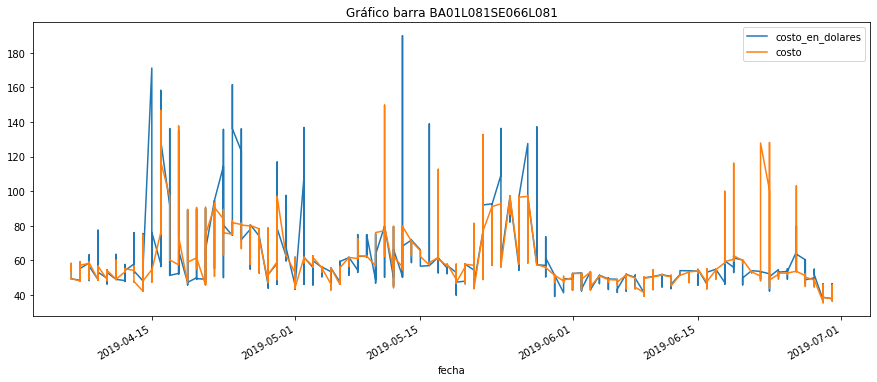

In [57]:
test = time_plot_costo_barra('BA01L081SE066L081', '2019-04-06', '2019-10-10')

## Analisis!!!

In [ ]:
# Además, identifica la barra que tiene cmg_real= 0 durante todos los días y elimínala de tu dataset

# 4. Base para los modelos

In [59]:
df_pred = pd.read_csv(url_base_pred)
df_pred

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.000,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.000,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.000,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.000,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.000,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112774,SE170T005,2019-06-30 00:00:00 UTC,20,NaN,NaN,NaN,NaN,0.775,44.1,41.362200,2.74,6.62,3,9334786,30.14000
112775,SE170T005,2019-06-30 00:00:00 UTC,21,NaN,NaN,NaN,NaN,0.925,44.1,42.217780,1.88,4.45,3,9353773,30.14000
112776,SE170T005,2019-06-30 00:00:00 UTC,22,NaN,NaN,NaN,NaN,0.975,44.1,42.197451,1.90,4.50,3,9114529,30.14000
112777,SE170T005,2019-06-30 00:00:00 UTC,23,NaN,NaN,NaN,NaN,0.750,44.1,41.473556,2.63,6.34,3,8118728,30.14000


### Descripcion del df y variables!

In [60]:
df_pred['fecha'] =  pd.to_datetime(df_pred['fecha'])

In [74]:
# fecha está en año-mes-día
df_pred['año'] = df_pred['fecha'].dt.year
df_pred['mes'] = df_pred['fecha'].dt.month
df_pred['semana'] = df_pred['fecha'].dt.week
df_pred['dia_cal'] = df_pred['fecha'].dt.day
df_pred['dia_sem'] = df_pred['fecha'].dt.weekday  # 0 = lunes, 6 = domingo
df_pred['fin_de_semana'] = df_pred['dia_sem'].apply(lambda x: 1 if x >4 else 0)

In [182]:
df_pred.tail()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,año,mes,semana,dia_cal,dia_sem,fin_de_semana
112774,SE170T005,2019-06-30 00:00:00+00:00,20,NaN,NaN,NaN,NaN,0.775,44.1,41.362200,...,6.62,3,9334786,30.14,2019,6,26,30,6,1
112775,SE170T005,2019-06-30 00:00:00+00:00,21,NaN,NaN,NaN,NaN,0.925,44.1,42.217780,...,4.45,3,9353773,30.14,2019,6,26,30,6,1
112776,SE170T005,2019-06-30 00:00:00+00:00,22,NaN,NaN,NaN,NaN,0.975,44.1,42.197451,...,4.50,3,9114529,30.14,2019,6,26,30,6,1
112777,SE170T005,2019-06-30 00:00:00+00:00,23,NaN,NaN,NaN,NaN,0.750,44.1,41.473556,...,6.34,3,8118728,30.14,2019,6,26,30,6,1
112778,SE170T005,2019-06-30 00:00:00+00:00,24,NaN,NaN,NaN,NaN,0.700,44.1,36.197329,...,21.82,3,6888256,30.14,2019,6,26,30,6,1


In [177]:
def plot_multiple(codigo_sub, variable, fecha):
    for i in fecha:
        df = df_pred[(df_pred['nemotecnico_se'] == codigo_sub)
                 & (df_pred['fecha'] == i)]
        df = df.sort_values('hora')
        df.set_index('hora', inplace = True)
        df[variable].plot(figsize = (15,6), legend = True,  
                          title = f'{codigo_sub}', label = f'{variable}  fecha: {i}')

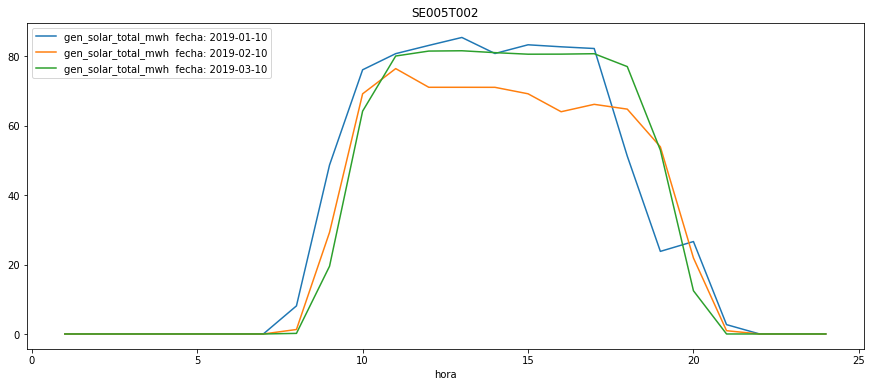

In [178]:
plot_multiple('SE005T002', 'gen_solar_total_mwh', ['2019-01-10', '2019-02-10', '2019-03-10' ])

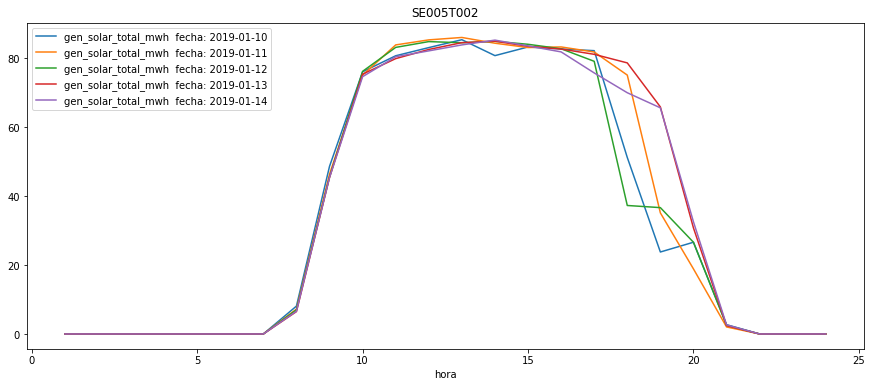

In [179]:
fechas = ['2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14']
plot_multiple('SE005T002', 'gen_solar_total_mwh', fechas)

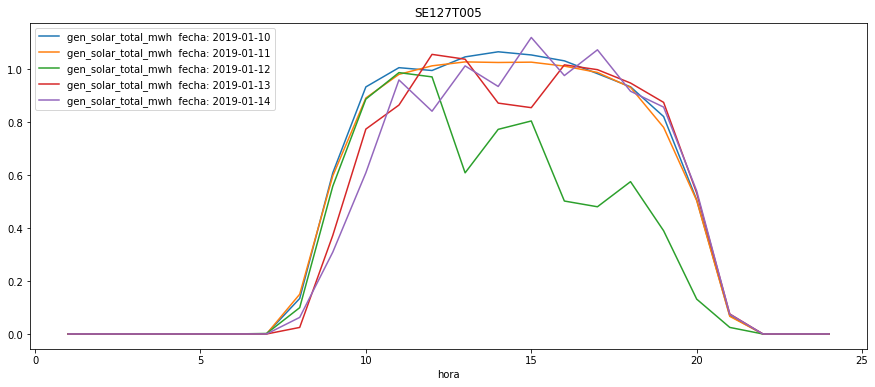

In [180]:
fechas = ['2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14']
plot_multiple('SE127T005', 'gen_solar_total_mwh', fechas)

In [184]:
df_pred[df_pred['nemotecnico_se'] == 'SE127T005']

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,año,mes,semana,dia_cal,dia_sem,fin_de_semana
104089,SE127T005,2019-01-01 00:00:00+00:00,1,NaN,NaN,0.068164,0.000000,NaN,48.26,48.298212,...,-0.08,3,10165845,50.1488,2019,1,1,1,1,0
104090,SE127T005,2019-01-01 00:00:00+00:00,2,NaN,NaN,0.068308,0.000000,NaN,48.26,48.361126,...,-0.21,3,10621459,50.1488,2019,1,1,1,1,0
104091,SE127T005,2019-01-01 00:00:00+00:00,3,NaN,NaN,0.067906,0.000000,NaN,47.30,47.867564,...,-1.19,3,10635561,50.1488,2019,1,1,1,1,0
104092,SE127T005,2019-01-01 00:00:00+00:00,4,NaN,NaN,0.068279,0.000000,NaN,46.50,47.616449,...,-2.35,3,10301422,50.1488,2019,1,1,1,1,0
104093,SE127T005,2019-01-01 00:00:00+00:00,5,NaN,NaN,0.068743,0.000000,NaN,44.53,47.616449,...,-6.49,3,10299393,50.1488,2019,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108429,SE127T005,2019-01-23 00:00:00+00:00,21,NaN,NaN,0.000000,0.054848,NaN,0.00,53.285800,...,-100.01,3,20304953,50.1488,2019,1,4,23,2,0
108430,SE127T005,2019-01-23 00:00:00+00:00,22,NaN,NaN,0.000000,0.000000,NaN,0.00,53.478317,...,-100.00,3,19282966,50.1488,2019,1,4,23,2,0
108431,SE127T005,2019-01-23 00:00:00+00:00,23,NaN,NaN,0.000000,0.000000,NaN,0.00,53.133470,...,-99.99,3,21783237,50.1488,2019,1,4,23,2,0
108432,SE127T005,2019-01-23 00:00:00+00:00,24,NaN,NaN,0.000000,0.000000,NaN,0.00,53.140033,...,-100.00,3,10744305,50.1488,2019,1,4,23,2,0


## analisis

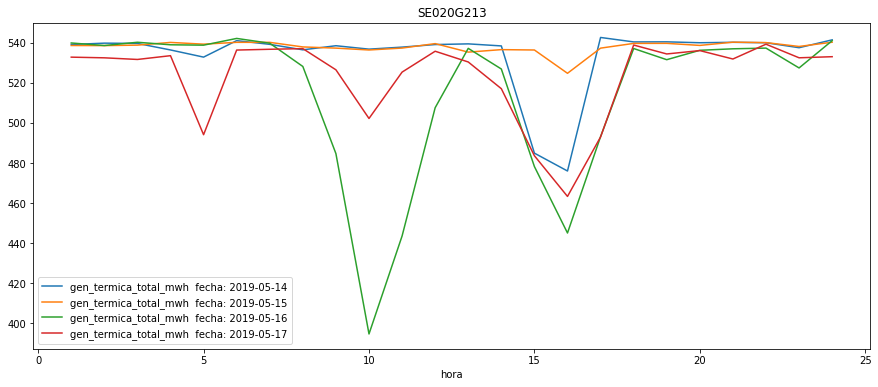

In [186]:
fechas = ['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17']
plot_multiple('SE020G213', 'gen_termica_total_mwh', fechas)

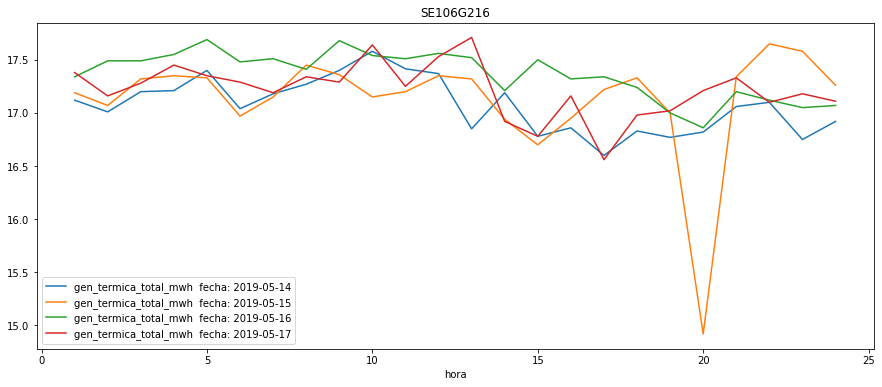

In [187]:
fechas = ['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17']
plot_multiple('SE106G216', 'gen_termica_total_mwh', fechas)

# 5. Predicción de desviaciones del costo marginal: modelo 1

In [218]:
df_pred.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'gen_eolica_total_mwh',
       'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog',
       'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw',
       'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana', 'target',
       'en_total_mwh'],
      dtype='object')

In [191]:
df_pred['target'] = df_pred['cmg_desv_pct'].apply(lambda x: 0 if x >15 or x<-15 else 1)

In [204]:
df_pred['en_total_mwh'] = df_pred.iloc[:,3:8].sum(axis=1)

In [216]:
sub = df_pred[['nemotecnico_se', 'fecha', 'hora', 'cmg_real', 'cmg_prog', 'cmg_desv', 'cmg_desv_pct']]

In [217]:
sub

,nemotecnico_se,fecha,hora,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct
0,SE031G216,2019-01-04 00:00:00+00:00,1,56.2,55.627852,0.57,1.02
1,SE031G216,2019-01-04 00:00:00+00:00,2,56.2,55.376645,0.82,1.48
2,SE031G216,2019-01-04 00:00:00+00:00,3,56.2,59.531891,-3.33,-5.59
3,SE031G216,2019-01-04 00:00:00+00:00,4,56.2,174.378923,-118.18,-67.77
4,SE031G216,2019-01-04 00:00:00+00:00,5,56.2,172.820310,-116.62,-67.48
...,...,...,...,...,...,...,...
112774,SE170T005,2019-06-30 00:00:00+00:00,20,44.1,41.362200,2.74,6.62
112775,SE170T005,2019-06-30 00:00:00+00:00,21,44.1,42.217780,1.88,4.45
112776,SE170T005,2019-06-30 00:00:00+00:00,22,44.1,42.197451,1.90,4.50
112777,SE170T005,2019-06-30 00:00:00+00:00,23,44.1,41.473556,2.63,6.34
